In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Charger le dataset
data = pd.read_csv(r'Z:\Study\Data Mining\Tps-Aoudjit\miniprojet2\data\data-Clustering Hiérarchique.csv')
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  28729 non-null  object 
 1   day                      28729 non-null  int64  
 2   month                    28729 non-null  int64  
 3   year                     28729 non-null  int64  
 4   cases                    28636 non-null  float64
 5   deaths                   28437 non-null  float64
 6   countriesAndTerritories  28729 non-null  object 
 7   geoId                    28729 non-null  object 
 8   countryterritoryCode     28729 non-null  object 
 9   popData2020              28729 non-null  int64  
 10  continentExp             28729 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.4+ MB


In [31]:
print("\nStats descriptive :")
data.describe()


Stats descriptive :


,day,month,year,cases,deaths,popData2020
count,28729.000000,28729.000000,28729.000000,28636.000000,28437.000000,2.872900e+04
mean,15.681855,6.431446,2020.967559,6088.425129,40.866160,1.534803e+07
std,8.778566,3.223586,0.789220,21455.994469,128.729388,2.142396e+07
min,1.000000,1.000000,2020.000000,-348846.000000,-217.000000,3.874700e+04
25%,8.000000,4.000000,2020.000000,111.000000,0.000000,2.095861e+06
50%,16.000000,6.000000,2021.000000,705.000000,5.000000,6.951482e+06
75%,23.000000,9.000000,2022.000000,3483.250000,31.000000,1.152244e+07
max,31.000000,12.000000,2022.000000,501635.000000,13743.000000,8.316671e+07


In [32]:
print("\n Les valeurs manquantes :")
data.isnull().sum()


 Les valeurs manquantes :


dateRep                      0
day                          0
month                        0
year                         0
cases                       93
deaths                     292
countriesAndTerritories      0
geoId                        0
countryterritoryCode         0
popData2020                  0
continentExp                 0
dtype: int64

In [33]:
# Supprimer les valeurs aberrantes (cas et décès négatifs)
df_cleaned = data[(data['cases'] >= 0) & (data['deaths'] >= 0)].copy()

# Remplacer les valeurs manquantes par 0 pour `cases` et `deaths`
df_cleaned['cases'] = df_cleaned['cases'].fillna(0)
df_cleaned['deaths'] = df_cleaned['deaths'].fillna(0)

In [34]:
# Vérifier les statistiques après nettoyage
print("\nStatistiques après nettoyage :")
print(df_cleaned[['cases', 'deaths']].describe())

# Vérifier s'il reste des valeurs manquantes
print("\nValeurs manquantes après nettoyage :")
df_cleaned.isnull().sum()


Statistiques après nettoyage :
               cases        deaths
count   28313.000000  28313.000000
mean     6167.821531     40.952036
std     21465.114301    128.982539
min         0.000000      0.000000
25%       119.000000      0.000000
50%       724.000000      5.000000
75%      3565.000000     31.000000
max    501635.000000  13743.000000

Valeurs manquantes après nettoyage :


dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2020                0
continentExp               0
dtype: int64

In [35]:
# Agrégation par pays
country_stats = df_cleaned.groupby('countriesAndTerritories').agg(
    total_cases=('cases', 'sum'),
    total_deaths=('deaths', 'sum'),
    population=('popData2020', 'first')  # La population est fixe pour chaque pays
).reset_index()

# Calcul des ratios populationnels
country_stats['incidence_rate'] = (country_stats['total_cases'] / country_stats['population']) * 100000
country_stats['mortality_rate'] = (country_stats['total_deaths'] / country_stats['population']) * 100000

# Trier les pays par nombre total de cas
country_stats = country_stats.sort_values(by='total_cases', ascending=False)

# Afficher les résultats
print("\nStats de chaque pays :")
print(country_stats.head(5))


Stats de chaque pays :
   countriesAndTerritories  total_cases  total_deaths  population  \
9                   France   36952159.0      156518.0    67320216   
10                 Germany   35287690.0      152753.0    83166711   
15                   Italy   23359251.0      178617.0    59641488   
28                   Spain   13564823.0      111649.0    47332614   
21             Netherlands    8494705.0       22771.0    17407585   

    incidence_rate  mortality_rate  
9     54890.137310      232.497769  
10    42430.065558      183.670844  
15    39166.110343      299.484480  
28    28658.512289      235.881754  
21    48798.871297      130.810793  


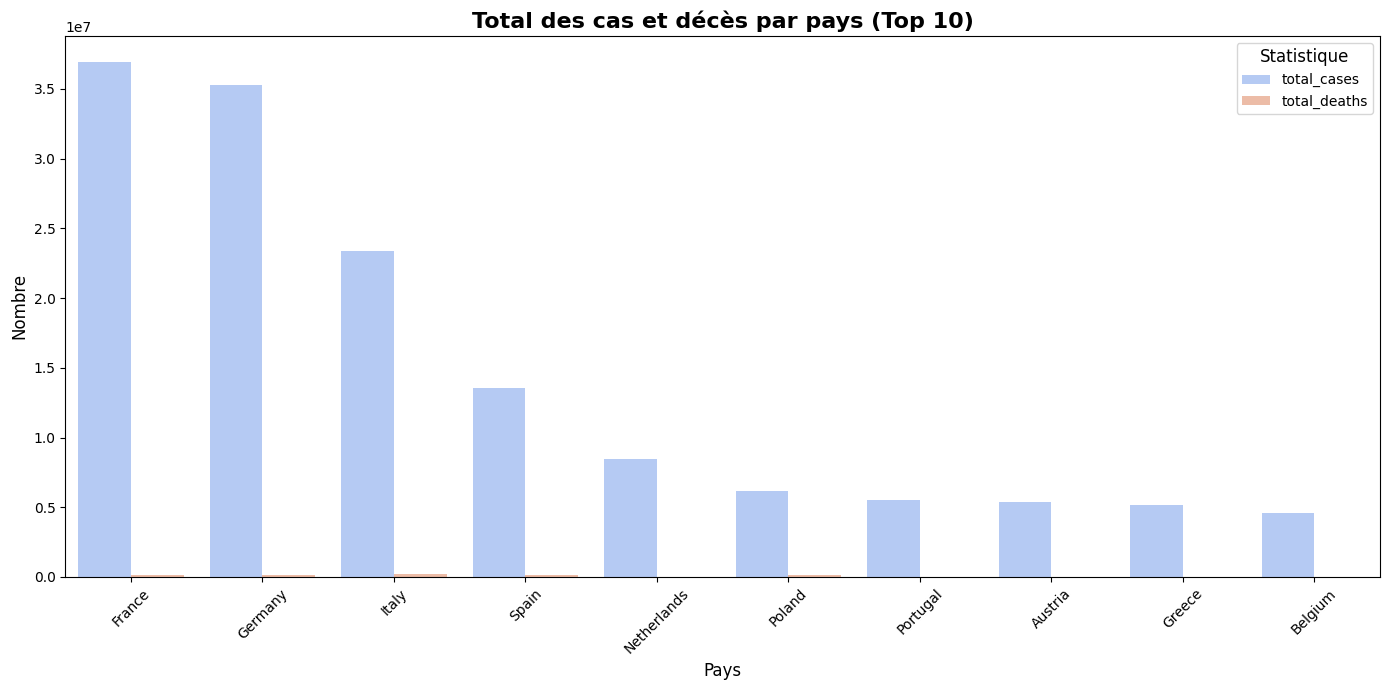

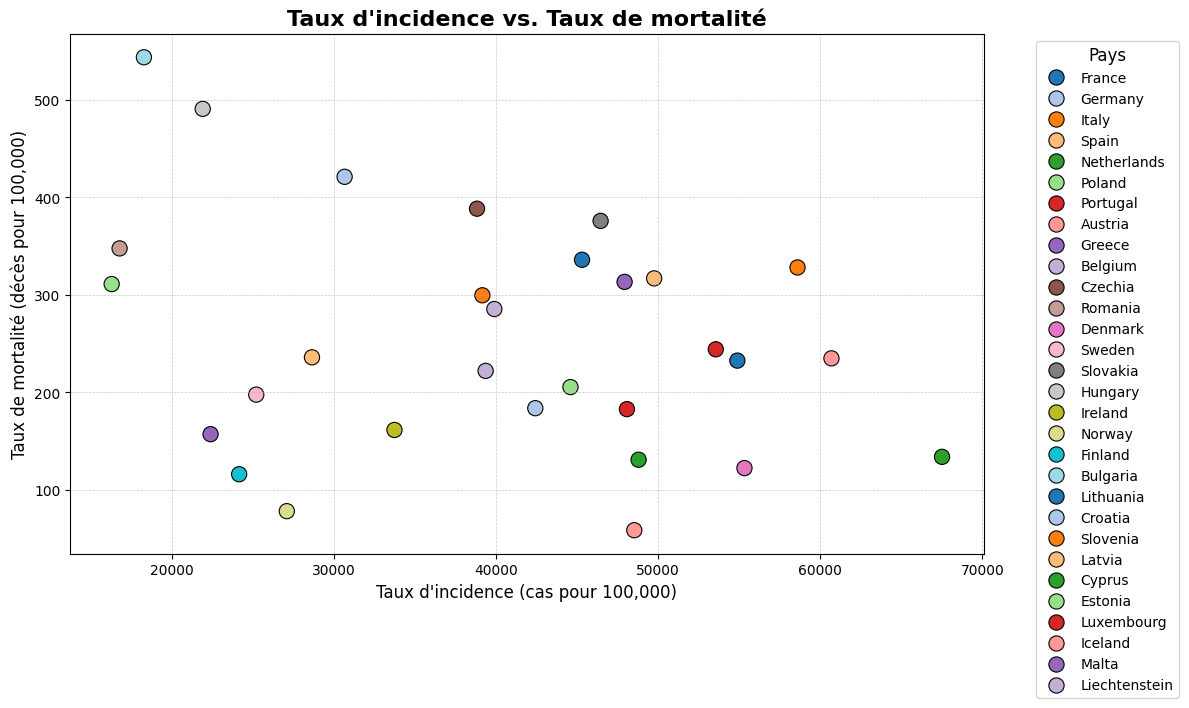

In [36]:
# Barplot des cas totaux et des décès par pays
plt.figure(figsize=(14, 7))
sns.barplot(
    data=country_stats.head(10).melt(id_vars='countriesAndTerritories', value_vars=['total_cases', 'total_deaths']),
    x='countriesAndTerritories', y='value', hue='variable', palette='coolwarm'
)
plt.title("Total des cas et décès par pays (Top 10)", fontsize=16, fontweight='bold')
plt.xlabel("Pays", fontsize=12)
plt.ylabel("Nombre", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Statistique", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot des taux d'incidence et de mortalité
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=country_stats, x='incidence_rate', y='mortality_rate', hue='countriesAndTerritories',
    palette='tab20', s=120, edgecolor='black', linewidth=0.8
)
plt.title("Taux d'incidence vs. Taux de mortalité", fontsize=16, fontweight='bold')
plt.xlabel("Taux d'incidence (cas pour 100,000)", fontsize=12)
plt.ylabel("Taux de mortalité (décès pour 100,000)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


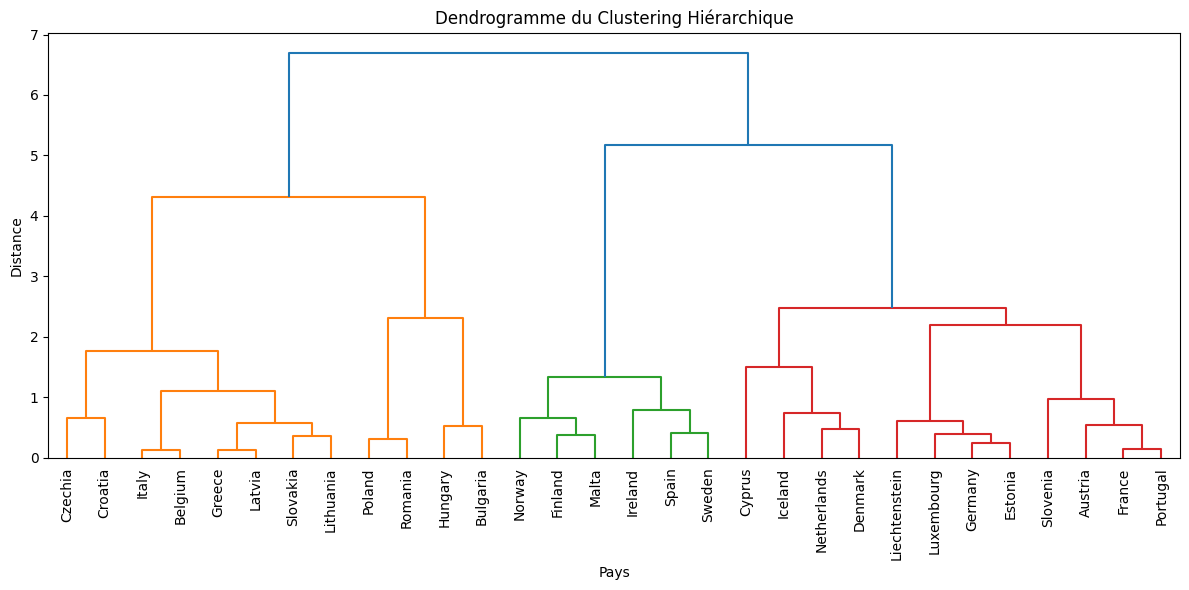


Pays et leurs clusters :
   countriesAndTerritories  cluster
26                Slovakia        1
16                  Latvia        1
18               Lithuania        1
1                  Belgium        1
11                  Greece        1
5                  Czechia        1
15                   Italy        1
3                  Croatia        1
25                 Romania        2
12                 Hungary        2
2                 Bulgaria        2
23                  Poland        2
28                   Spain        3
29                  Sweden        3
20                   Malta        3
14                 Ireland        3
22                  Norway        3
8                  Finland        3
7                  Estonia        4
4                   Cyprus        4
19              Luxembourg        4
13                 Iceland        4
9                   France        4
6                  Denmark        4
0                  Austria        4
24                Portugal        4
21

In [37]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Sélectionner les variables pour le clustering
data_for_clustering = country_stats[['incidence_rate', 'mortality_rate']]

# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# Clustering hiérarchique
linked = linkage(data_normalized, method='ward')

# Dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=country_stats['countriesAndTerritories'].to_numpy(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme du Clustering Hiérarchique")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Découper l'arbre en clusters
n_clusters = 4  # Nombre de clusters (modifiable en fonction du dendrogramme)
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Ajouter les clusters au DataFrame
country_stats['cluster'] = clusters

# Afficher les résultats
print("\nPays et leurs clusters :")
print(country_stats[['countriesAndTerritories', 'cluster']].sort_values(by='cluster'))

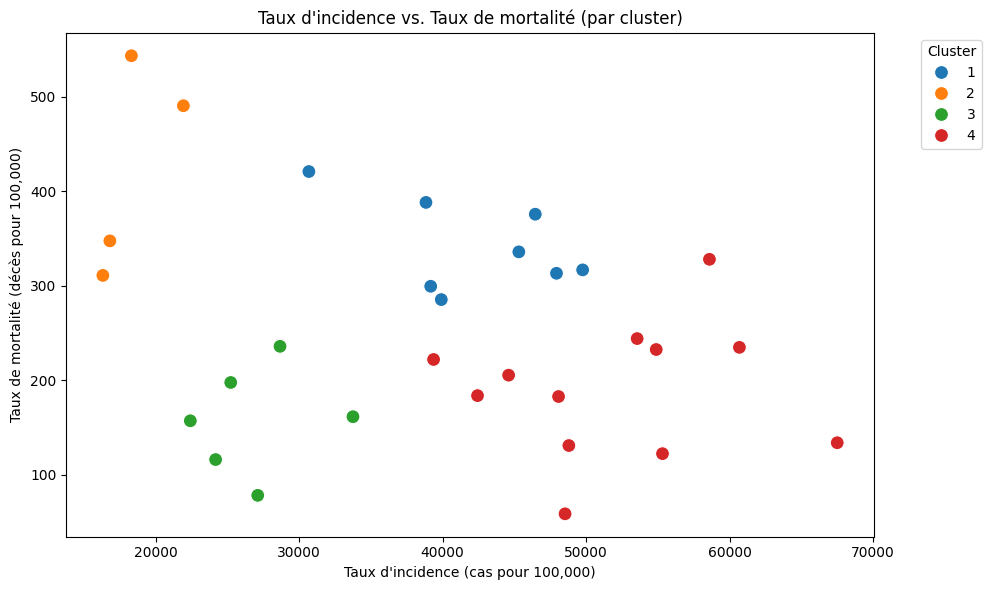

C:\Users\DELL\AppData\Local\Temp\ipykernel_11000\3462143481.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=country_stats, x='cluster', palette='tab10')


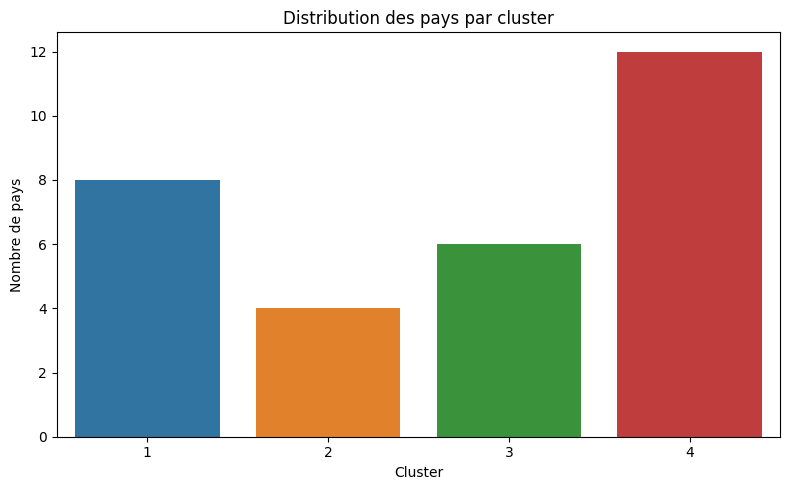

In [38]:
# Scatter plot des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_stats,
    x='incidence_rate', y='mortality_rate',
    hue='cluster', palette='tab10', s=100
)
plt.title("Taux d'incidence vs. Taux de mortalité (par cluster)")
plt.xlabel("Taux d'incidence (cas pour 100,000)")
plt.ylabel("Taux de mortalité (décès pour 100,000)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Barplot de la distribution des clusters
plt.figure(figsize=(8, 5))
sns.countplot(data=country_stats, x='cluster', palette='tab10')
plt.title("Distribution des pays par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre de pays")
plt.tight_layout()
plt.show()

In [41]:

# Sauvegarder les résultats
output_path = r'Z:\Study\Data Mining\Tps-Aoudjit\miniprojet2/clustering_hierarchique_results.csv'
country_stats.to_csv(output_path, index=False)
print(f"Les résultats ont été sauvegardés dans {output_path}.")


Les résultats ont été sauvegardés dans Z:\Study\Data Mining\Tps-Aoudjit\miniprojet2/clustering_hierarchique_results.csv.
